In [1]:
## Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

Data Source: https://www.kaggle.com/datasets/shivamshinde123/gesture-prediction-using-semg-data/data

In [2]:
## Merging the whole data into single csv file
df = pd.DataFrame(columns=['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8', 'class'])

Data_dir = "../Data/"
files = list()
for dir in os.listdir(Data_dir):
    for file in os.listdir(os.path.join(Data_dir,dir)):
        file_df = pd.read_csv(os.path.join(Data_dir, dir, file), sep="\t")
        file_df.drop(['time'], axis=1, inplace=True)
        file_df.drop_duplicates(keep='last', subset=['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8', 'class'], inplace=True)
        new_df = pd.concat([df, file_df],axis=0)
        df = new_df

C:\Users\shiva\AppData\Local\Temp\ipykernel_15612\997044554.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([df, file_df],axis=0)


In [3]:
## Shape of newly created data
df.shape

(461178, 9)

In [4]:
## Glimpse of the data
df.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
13,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
19,-0.00001,-0.00001,-0.00006,-0.00005,-0.00003,-0.00003,-0.00002,-0.00002,0
30,-0.00003,-0.00001,-0.00004,-0.00001,-0.00001,0.00001,-0.00002,0.00000,0
31,-0.00001,-0.00001,-0.00002,0.00004,-0.00001,-0.00001,0.00000,-0.00001,0


In [5]:
## Checking the datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 461178 entries, 1 to 49363
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   channel1  461178 non-null  float64
 1   channel2  461178 non-null  float64
 2   channel3  461178 non-null  float64
 3   channel4  461178 non-null  float64
 4   channel5  461178 non-null  float64
 5   channel6  461178 non-null  float64
 6   channel7  461178 non-null  float64
 7   channel8  461178 non-null  float64
 8   class     461177 non-null  object 
dtypes: float64(8), object(1)
memory usage: 35.2+ MB


In [6]:
## Changing the datatype of class feature from object to numeric one
df['class'] = df['class'].apply(pd.to_numeric)

In [7]:
## Checking the datatypes again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 461178 entries, 1 to 49363
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   channel1  461178 non-null  float64
 1   channel2  461178 non-null  float64
 2   channel3  461178 non-null  float64
 3   channel4  461178 non-null  float64
 4   channel5  461178 non-null  float64
 5   channel6  461178 non-null  float64
 6   channel7  461178 non-null  float64
 7   channel8  461178 non-null  float64
 8   class     461177 non-null  float64
dtypes: float64(9)
memory usage: 35.2 MB


In [8]:
## checking the number of unique values in each of the  features
for feature in df.columns:
    print(f"The number of unique values in the  feature named {feature} are {df[feature].nunique()}")

The number of unique values in the  feature named channel1 are 256
The number of unique values in the  feature named channel2 are 256
The number of unique values in the  feature named channel3 are 256
The number of unique values in the  feature named channel4 are 256
The number of unique values in the  feature named channel5 are 256
The number of unique values in the  feature named channel6 are 256
The number of unique values in the  feature named channel7 are 256
The number of unique values in the  feature named channel8 are 256
The number of unique values in the  feature named class are 8


In [9]:
df.isnull().sum()

channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       1
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
## Reading the newly created data
df.to_csv('../transformed_data/transformed_data.csv', index=False)

In [12]:
## Splitting the data into independent features and dependent features
X, y = df.drop('class', axis=1), df['class']

## Splitting the data into training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=34, stratify=y)

In [13]:
## checking the number of rows and columns in the X_train
print(f"The number of rows in the train data are {X_train.shape[0]}.")
print(f"The number of columns in the train data are {X_train.shape[1]}.")

## checking the number of rows and columns in the X_test
print(f"The number of rows in the test data are {X_test.shape[0]}.")
print(f"The number of columns in the test data are {X_test.shape[1]}.")

The number of rows in the train data are 456565.
The number of columns in the train data are 8.
The number of rows in the test data are 4612.
The number of columns in the test data are 8.


In [14]:
## finding out if any feature has zero variance (numerical feature)
print("Numerical features having zero variance:\n")
for feature in X_train.columns:
    if X_train[feature].var() == 0:
        print(feature)

Numerical features having zero variance:



Data has no features with zero variance

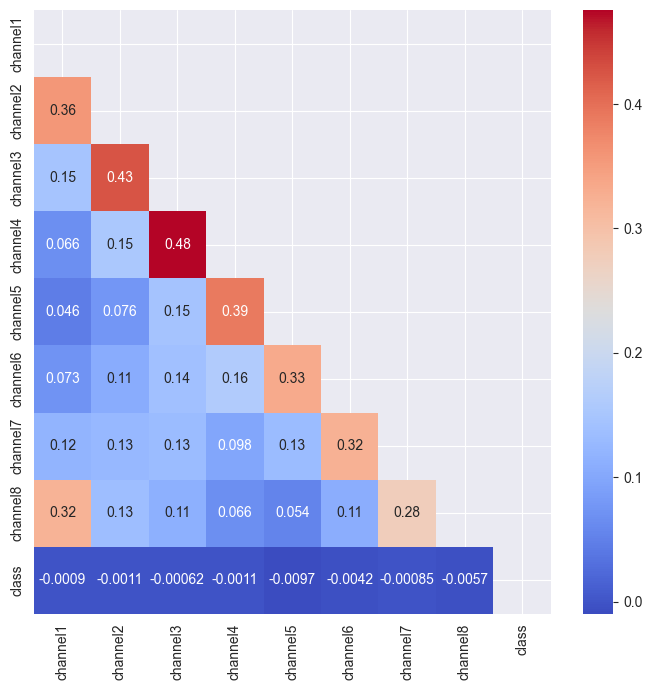

In [15]:
## checking the correlation between the  independent features and depedent feature LC50(mol/L)
sns.set_style('darkgrid')
plt.figure(figsize=(7,7))
data = pd.concat([X_train, pd.DataFrame(y_train, columns=['class'])], axis=1)
corr = data[data.columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=mask)
plt.tight_layout()

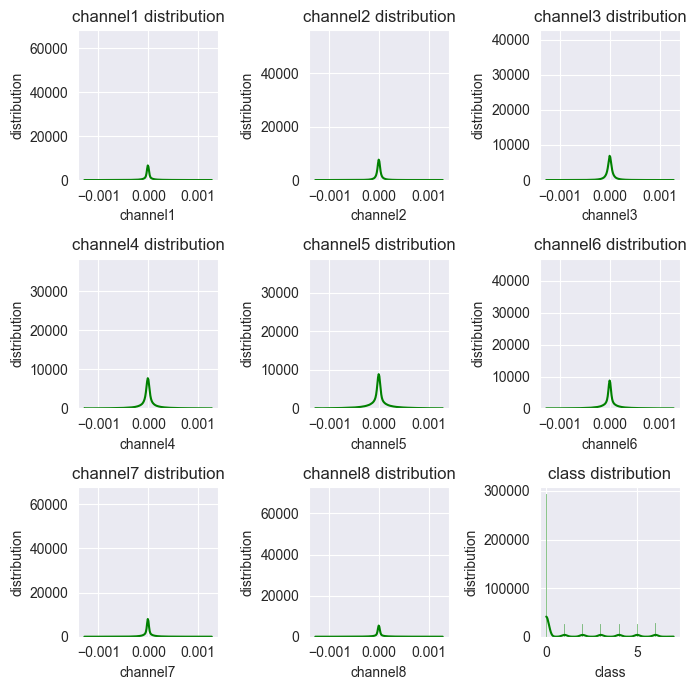

In [16]:
## checking the distribution of features

sns.set_style('darkgrid')
plt.figure(figsize=(7,7))
data = pd.concat([X_train, pd.DataFrame(y_train, columns=['class'])], axis=1)
for index, feature in enumerate(data.columns):
    plt.subplot(3,3,index+1)
    sns.histplot(data[feature],kde=True, color='g')
    plt.xlabel(feature)
    plt.ylabel('distribution')
    plt.title(f"{feature} distribution")

plt.tight_layout()

The data distribution kinda looks like normal distribution, so we wil leave it as it is.

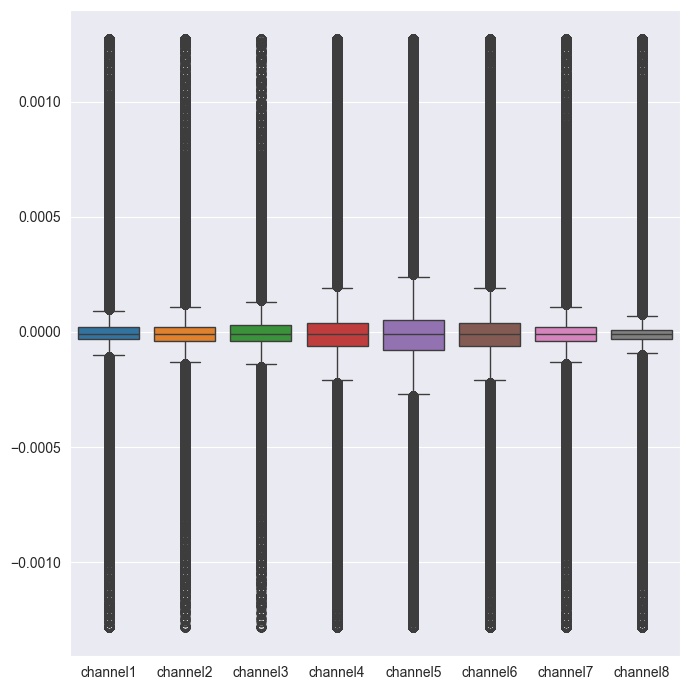

In [17]:
## finding out the outliers in the features using box plot
plt.figure(figsize=(7,7))
sns.boxplot(data=X_train[X_train.columns], orient='v')
plt.tight_layout()

Looks like the data has a lot of outliers. But here we removed them then a lot of data will be removed. So, we will keep them as they are for now. First we will check the 
accuracy of model and then will decide what to do with them.